# Выявление закономерностей определяющих успешность компьютерной игры 

Интернет-магазин «Стримчик» занимается продажей компьютерных игр по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Имеются данные до 2016 года, требуется спланировать гипотетическую кампанию на 2017-й год.

### Цель исследования

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Также необходимо ответить на ряд вопросов:
- сколько игр выпускалось в разные годы? Определить важность данных за имеющиеся периоды.
- за какой характерный срок появляются новые и исчезают старые платформы?
- какие платформы лидируют по продажам, растут или падают?
- как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
- какими отличительными особенностями обладают самые прибыльные жанры?
- выделяются ли жанры с высокими и низкими продажами?

Также необходимо принять либо опровергнуть гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Ход исследования

Данные о продаже игр представлены в файле games.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится провести обзор данных. Будет проведена проверка данных на ошибки и оценнено их влияние на исследование. Затем, на этапе предобработки будут исправлены самые критичные ошибки данных. 

Таким образом, исследование пройдёт в три этапа:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных
- Проверка гипотез.

___
## Обзор данных
___

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
import math
from scipy import stats as st
from scipy.stats import bartlett
import warnings
warnings.filterwarnings('ignore')

Прочитаем файлы с данными из папки /datasets и сохраним их в переменных:

In [2]:
try:
    df = pd.read_csv('/Users/vladislav/Documents/datasets/games.csv',sep=',')
except:
    df = pd.read_csv('/datasets/games.csv',sep=',')

Составим первое представление о данных:

In [3]:
display(df.head())
df.info()
display(df.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Итак, в таблице 11 столбцов. Представлены типы данных **object,float64**. Согласно документации к данным:

* *Name* — название игры;
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

По предварительному обзору данных можно отметить следующие **проблемы в данных**:
- пропуски отсутствуют только в столбцах с указанием страны, где покупалась игра и в столбце платформы, в остальных столбцах имеются пропущенные значения;

- названия столбцов необходимо переименовать согласно правилам "змеиного регистра";
- проставленный тип данных столбцов *Year_of_Release* и *User_score* не соответствует оптимальному типу данных для работы с этими значениями.

Далее можно перейти к предобработке данных.
___

## Предобработка данных

Для начала надо изменить заголовки столбцов

In [4]:
df = df.rename(columns={"Name":"name",
                  "Platform":"platform",
                  "Year_of_Release":"year_of_release",
                  "Genre":"genre",
                  "NA_sales":"na_sales",
                  "EU_sales":"eu_sales",
                  "JP_sales":"jp_sales",
                  "Other_sales":"other_sales",
                  "Critic_Score":"critic_score",
                  "User_Score":"user_score",
                  "Rating":"rating"})

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


___
В столбце *name* отсутствуют 2 значения.

In [6]:
df.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как в 2-х данных строках помимо отсутствия названия, отсутствуют более важные данные по жанру и оценкам игры их проще удалить.

In [7]:
df = df.drop(df.query('name != name').index)

___
В столбце *year_of_release* доля пропусков составляет:

In [8]:
display("{:.2%}".format(df['year_of_release'].isna().sum()/len(df)))

'1.61%'

Изучим пропуски в столбце *year_of_release*:

In [9]:
df.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видно, что в столбце 269 пропусков, при этом в названии части игр спортивного жанра указан год выпуска. Эти данные можно использовать, чтобы вернуть год выпуска игры.

In [10]:
df_no_year = df.query('year_of_release != year_of_release')
df_no_year_sport = df_no_year[df_no_year['name'].str.contains('20|19')]
df_no_year_sport['year_of_release'] = df_no_year_sport['name'].str[-4:]
df_no_year_sport

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,0-03,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,ccer,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,2002,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,013),Action,0.06,0.25,0.00,0.04,86.0,8.5,M


Данные из названия получены, но в названии трех игр год шел не в конце, можно заменить эти значения вручную.
Игру под названием "Jet X20" нужно удалить, цифры в ее названии не связаны с датой выпуска.

In [11]:
df_no_year_sport.loc[(df_no_year_sport.name == "MLB SlugFest 20-03"),'year_of_release'] = 2003
df_no_year_sport.loc[(df_no_year_sport.name == "PES 2009: Pro Evolution Soccer"),'year_of_release'] = 2009
df_no_year_sport.loc[(df_no_year_sport.name == "Tomb Raider (2013)"),'year_of_release'] = 2013
df_no_year_sport = df_no_year_sport.drop(df_no_year_sport.query('name == "Jet X20"').index)
df_no_year_sport

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,2003,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,2009,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,2002,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,2013,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


Таким образом был получен срез игр, в названии которых была дата выпуска. Из него можно удалить ненужные столбцы и изменить формат года выпуска на числовой. Важный нюанс: год выпуска из названия по факту больше на единицу, чтобы название игры оставалось актуальным весь следующий год - в связи с этим из года в названии был вычтен 1 год.

In [12]:
df_no_year_sport.drop(['genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating'], axis=1, inplace=True)
df_no_year_sport['year_of_release'] = df_no_year_sport['year_of_release'].astype('float64')
df_no_year_sport['year_of_release'] = df_no_year_sport['year_of_release']-1
df_no_year_sport

,name,platform,year_of_release
183,Madden NFL 2004,PS2,2003.0
377,FIFA Soccer 2004,PS2,2003.0
475,wwe Smackdown vs. Raw 2006,PS2,2005.0
1650,NASCAR Thunder 2003,PS2,2002.0
2492,MLB SlugFest 20-03,PS2,2002.0
2572,PES 2009: Pro Evolution Soccer,PSP,2008.0
3486,Madden NFL 2002,XB,2001.0
4775,NFL GameDay 2003,PS2,2002.0
5156,NBA Live 2003,XB,2002.0
5336,Tomb Raider (2013),PC,2012.0


Теперь можно объеденить данную таблицу с основным датафреймом, чтобы взять из него недостающие данные.

In [13]:
df = df.merge(df_no_year_sport, how='left',on=['name','platform'])
df

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


Из нового столбца подтянем год для тех игр, где он ранее не был указан. Лучше сделать это с использованием функции.

In [14]:
def year_from_name(year_of_release_x,year_of_release_y):
    if year_of_release_x != year_of_release_x:
        return year_of_release_y
    else:
        return year_of_release_x
df['year_of_release_x'] = df.apply(lambda x: year_from_name(x.year_of_release_x, x.year_of_release_y),axis=1)
df.query('year_of_release_y == year_of_release_y')

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2005.0
1649,NASCAR Thunder 2003,PS2,2002.0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2002.0
2491,MLB SlugFest 20-03,PS2,2002.0,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E,2002.0
2571,PES 2009: Pro Evolution Soccer,PSP,2008.0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2008.0
3485,Madden NFL 2002,XB,2001.0,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2001.0
4774,NFL GameDay 2003,PS2,2002.0,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2002.0
5155,NBA Live 2003,XB,2002.0,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2002.0
5335,Tomb Raider (2013),PC,2012.0,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2012.0


Видно, что дата подтянулась, теперь можно удалить более ненужный столбец, а название исходного столбца с датой вернуть в первоначальный вид.

In [15]:
df.drop('year_of_release_y', axis = 1, inplace = True)
df.rename(columns={df.columns[2]: 'year_of_release'}, inplace=True)
df['year_of_release'].isna().sum()

251

Далее можно изучить оставшиеся игры без даты выпуска:

In [16]:
df.query('year_of_release != year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+


Вероятно какие-то из игр без даты публикации на одной платформе имели дату публикации на другой платформе:

In [17]:
df.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1518,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1537,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1552,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12464,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Информация подтвердилась. В идеале следовало бы запросить точную информацию по времени появления игры на каждой платформе, но в заданных условиях можно сделать предположение, что игры публиковались на разных платформах в примерно одинаковый промежуток времени. Тогда можно рассчитать медианное значение года публикации на всех платформах по названию игры и вернуть его для строк с пропусками.

In [18]:
df['year_of_release'] = df.groupby('name')['year_of_release'].transform(lambda x: x.fillna(x.median()))
df['year_of_release'].isna().sum()

139

После замены осталось 139 пропущенных значений в дате публикации.

Согласно вводным условиям исследования игровые платформы имеют определенный срок "жизни" во время которого ею активно пользуются, и во время которого на нее выпускаются новые игры. Исходя из данного предположения, можно заменить пропуски на медианное значение года публикации всех игр для каждой из платформ.

In [19]:
df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))
df['year_of_release'].isna().sum()

0

Пропусков в данном столбце больше нет. Изучим значения по годам, на предмет некорректных данных.

In [20]:
df['year_of_release'].value_counts()

2008.0    1461
2009.0    1455
2010.0    1284
2007.0    1204
2011.0    1164
2006.0    1020
2005.0     949
2002.0     843
2003.0     797
2004.0     773
2012.0     663
2015.0     606
2014.0     582
2013.0     552
2016.0     502
2001.0     485
1998.0     386
2000.0     351
1999.0     341
1997.0     290
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1982.0      52
1981.0      46
1992.0      43
1991.0      41
1986.0      21
1983.0      17
2004.5      17
1989.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2002.5       2
2001.5       1
2005.5       1
Name: year_of_release, dtype: int64

По данной группировке видно, что в столбце присутствуют частично некорректные данные, которые, вероятно, получились после замены на медианное значение. Необходимо заменить эти данные.

In [21]:
df.loc[(df['year_of_release'] > 2002)&(df['year_of_release'] < 2003), 'year_of_release'] = 2002
df.loc[(df['year_of_release'] > 2001)&(df['year_of_release'] < 2002), 'year_of_release'] = 2001
df.loc[(df['year_of_release'] > 2005)&(df['year_of_release'] < 2006), 'year_of_release'] = 2005
df.loc[(df['year_of_release'] > 2002)&(df['year_of_release'] < 2003)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Избавившись от некорректных значений и пропусков нужно привести данные по годам к целочисленному формату.

In [22]:
df['year_of_release'] = df['year_of_release'].astype('int64')

Теперь можно изучить распределение игр по годам

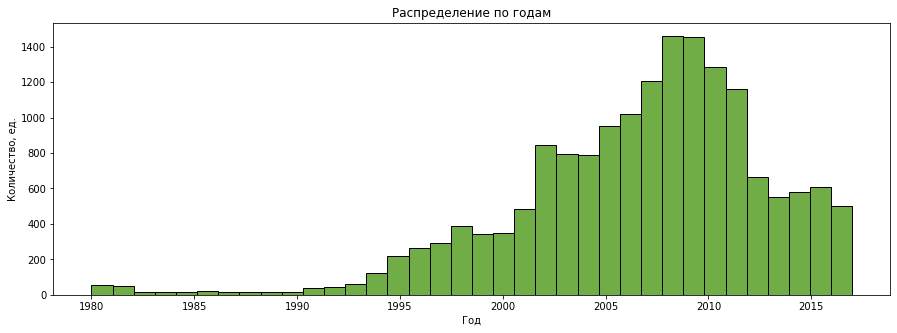

In [23]:
df['year_of_release'].plot(kind='hist', bins=36, range=(1980,2017), figsize=(15,5),  color="#70AD47", edgecolor="black")
plt.title("Распределение по годам")
plt.xlabel("Год")
plt.ylabel("Количество, ед.")
plt.show()

По распределению видно, с 80-х по середину 90-х годов объем выпускаемых игр на всех платформах был минимальным, что характерно для начала развития отрасли как таковой. Начиная с середины 90-х годов с ростом производительности персональных компьютеров, а также выходом игровых консолей т.н. 5-го поколения (прим. Playstation от компании Sony, Nintendo 64, Sega Saturn) происходит почти 10-кратный рост количества выпускаемых видеоигр. 

Следующий заметный прирост количества выпускаемых игровых тайтлов наблюдается в начале 2000-х: спустя 1-2 года после выпуска  консолей 6-го поколения: Playstation 2 и Xbox (вместе с запуском многопользовательского онлайн-сервиса Xbox live).

В 2011-2013 на рынок выходят т.н. игровые консоли восьмого поколения отличающиеся от предшественников лишь небольшим приростом производительности, в то время, как предыдущие модели чаще базировались на новых революционных технологиях. Спадает интерес на управление с помощью движений возвращаясь к классическим геймпадам. 
В дополнение к этому мощность смартфонов уже позволяет им полноценно конкурировать с в консолями в мобильной игровой индустрии. Данные причины в совокупности обусловлили снижение количества выпускаемых игр.

Таким  образом данные по году выпуска распределены логично,  и не вызывают дополнительных вопросов.
___

В столбце *genre* нет пропущенных значений. Следует проверить его на наличие скрытых дубликатов.

In [24]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Дубликатов нет, можно перейти к предобработке данных в следующем столбце.
___

В столбце *platform* нет пропущенных значений. Следует также проверить его на наличие скрытых дубликатов.

In [25]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

В данном столбце дубликатов также нет, можно перейти к предобработке данных в следующем столбце.
___

Изучим данные по продажам в Северной Америке в *na_sales*. По описанию датафрейма выше, было видно, что в столбце нет пропусков, а данные имеют числовой формат (float64). Построим гистограмму распределения.

In [26]:
display("Доля игр, которая продавалась в Северной Америке: {:.2%}".format(df.query('na_sales != 0')['na_sales'].count()/len(df)))
display("Доля игр, которая продавалась в Европе: {:.2%}".format(df.query('eu_sales != 0')['eu_sales'].count()/len(df)))
display("Доля игр, которая продавалась в Японии: {:.2%}".format(df.query('jp_sales != 0')['jp_sales'].count()/len(df)))
display("Доля игр, которая продавалась в других странах: {:.2%}".format(df.query('other_sales != 0')['other_sales'].count()/len(df)))
df[['na_sales','eu_sales','jp_sales','other_sales']].describe()

'Доля игр, которая продавалась в Северной Америке: 73.03%'

'Доля игр, которая продавалась в Европе: 64.88%'

'Доля игр, которая продавалась в Японии: 37.10%'

'Доля игр, которая продавалась в других странах: 60.51%'

,na_sales,eu_sales,jp_sales,other_sales
count,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343
std,0.813565,0.503359,0.308871,0.186742
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


По условиям исследования необходимо добавить суммарное значение по продажам во всех странах для каждой игры.

In [27]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

___
Далее следует столбцы *critic_score* и *user_score*.

В столбце *user_score* присутствуют значения "tbd",  что можно расшифровать как "to be decided" или "to be determined", что означает, что оценка подлежит уточнению. В заданных условиях для исследования это равносильно пропущенному значению, потому что дождаться или уточнить эту информацию нельзя. Таким образом, для возможности проведения расчетов с данными в этом столбце "tbd" лучше заменить на Nan. 

In [28]:
df['user_score'] = df['user_score'].replace(['tbd'], np.nan)
df['user_score'] = df['user_score'].astype('float64')
df[['critic_score','user_score']].describe()

,critic_score,user_score
count,8137.000000,7590.000000
mean,68.967679,7.125046
std,13.938165,1.500006
min,13.000000,0.000000
25%,60.000000,6.400000
50%,71.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


В столбцах нет выбросов, все значения похожи на реальные оценки. При этом в столбцах пропущена часть значений. Необходимо понять, по какой причине присутствуют пропуски, возможно есть закономерности.

In [29]:
display(df.groupby('year_of_release').apply(lambda x: x.critic_score.isnull().sum()/len(x)))
display(df.groupby('year_of_release').apply(lambda x: x.user_score.isnull().sum()/len(x)))

year_of_release
1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    0.928571
1986    1.000000
1987    1.000000
1988    0.933333
1989    1.000000
1990    1.000000
1991    1.000000
1992    0.976744
1993    1.000000
1994    0.991736
1995    1.000000
1996    0.969582
1997    0.941379
1998    0.917098
1999    0.885630
2000    0.592593
2001    0.320988
2002    0.240237
2003    0.245922
2004    0.267089
2005    0.301053
2006    0.381373
2007    0.421096
2008    0.501711
2009    0.546392
2010    0.591121
2011    0.559278
2012    0.503771
2013    0.500000
2014    0.549828
2015    0.628713
2016    0.537849
dtype: float64

year_of_release
1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    0.928571
1986    1.000000
1987    1.000000
1988    0.933333
1989    1.000000
1990    1.000000
1991    1.000000
1992    0.976744
1993    1.000000
1994    0.991736
1995    1.000000
1996    0.969582
1997    0.937931
1998    0.911917
1999    0.909091
2000    0.695157
2001    0.467078
2002    0.435503
2003    0.338770
2004    0.360759
2005    0.378947
2006    0.450000
2007    0.474252
2008    0.541410
2009    0.574570
2010    0.619159
2011    0.557560
2012    0.478130
2013    0.442029
2014    0.432990
2015    0.509901
2016    0.478088
dtype: float64

**По данному представлению видно, что по мере развития игровой индустрии во времени игры все чаще получали оценки от критиков и пользователей.**

Теперь можно восстановить пропущенные значения в данных столбцах. Алгоритм действий следующий:
- Восстановить часть значений рассчитав среднюю оценку по названию игры на других платформах;
- Восстановить часть значений рассчитав среднюю оценку критиков/пользователей при наличии значения в каком/либо из столбцов (с применением коэффициента)
- Восстановить часть оставшихся значений по средним оценкам в жанре на конкретной платформе.

In [30]:
df['critic_score'].corr(df['user_score'])

0.5808778320767236

In [31]:
df['critic_score'] = df.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.median()))
df['user_score'] = df.groupby('name')['user_score'].transform(lambda x: x.fillna(x.median()))

In [32]:
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,9098.000000,8689.000000
mean,68.784843,7.091512
std,14.124159,1.503294
min,13.000000,0.000000
25%,60.000000,6.300000
50%,71.000000,7.400000
75%,79.000000,8.200000
max,98.000000,9.700000


In [33]:
df['critic_to_user_score'] = (df['critic_score']/10)/df['user_score']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_to_user_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.950000
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.987952
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,1.000000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN


In [34]:
scores_ratio = df.groupby(['genre','platform']).agg({'critic_to_user_score':'median'}).reset_index()
scores_ratio

,genre,platform,critic_to_user_score
0,Action,2600,0.966667
1,Action,3DS,0.986842
2,Action,DC,NaN
3,Action,DS,0.890244
4,Action,GB,0.917219
...,...,...,...
288,Strategy,Wii,1.000000
289,Strategy,WiiU,0.875000
290,Strategy,X360,1.053571
291,Strategy,XB,0.862500


In [35]:
df = df.merge(scores_ratio, how = 'left', on = ['genre','platform'])
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_to_user_score_x,critic_to_user_score_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.950000,0.962963
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.987952,0.906579
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,1.000000,0.962963
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN,NaN


In [36]:
df.drop('critic_to_user_score_x', axis=1, inplace=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_to_user_score_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.962963
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.906579
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,0.962963
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN


In [37]:
def critic_scores_update(critic_score, user_score, critic_to_user_score_y):
    critic_by_ratio = user_score*critic_to_user_score_y*10
    
    if (critic_score != critic_score and
       user_score == user_score):
        return critic_by_ratio
    else:
        return critic_score
        
def user_scores_update(critic_score, user_score, critic_to_user_score_y):
    user_by_ratio = critic_score/critic_to_user_score_y/10
    
    if (critic_score == critic_score and
       user_score != user_score):
        return user_by_ratio
    else:
        return user_score
    
df['critic_score'] = df.apply(lambda x: critic_scores_update
                              (x.critic_score, x.user_score, x.critic_to_user_score_y), axis = 1)
df['user_score'] = df.apply(lambda x: user_scores_update
                              (x.critic_score, x.user_score, x.critic_to_user_score_y), axis = 1)

Можно удалить более ненужный столбец *critic_to_user_score_y'* и посмотреть, как отработала функция.

In [38]:
df.drop('critic_to_user_score_y', axis = 1, inplace = True)
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,9434.000000,9433.000000
mean,68.582791,7.029444
std,14.435827,1.503770
min,0.000000,0.000000
25%,60.000000,6.200000
50%,71.000000,7.400000
75%,79.000000,8.100000
max,98.000000,11.096985


После отработки функции видно, что максимальное значение в столбце *user_score* превышает 10. Необходимо это исправить, заменив выбивающиеся значения на максимальную оценку пользователей, которая была в датасете ранее - 9,7.

In [39]:
df.loc[df['user_score'] > 9.7, 'user_score'] = 9.7
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,9434.000000,9433.000000
mean,68.582791,7.029232
std,14.435827,1.503316
min,0.000000,0.000000
25%,60.000000,6.200000
50%,71.000000,7.400000
75%,79.000000,8.100000
max,98.000000,9.700000


Большую часть оставшихся пропущенных значений можно заменить медианным значеним по связке "платформа+жанр".

In [40]:
df['critic_score'] = df.groupby(['genre','platform'])['critic_score'].transform(lambda x: x.fillna(x.median()))
df['user_score'] = df.groupby(['genre','platform'])['user_score'].transform(lambda x: x.fillna(x.median()))
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,16332.000000,16303.000000
mean,68.719611,7.157684
std,11.818724,1.239966
min,0.000000,0.000000
25%,63.000000,6.700000
50%,69.000000,7.300000
75%,76.000000,7.900000
max,98.000000,9.700000


Минимальную оставшуюся часть пропусков ввиду недостатка иных вспомогательных данных можно заменить медианной  оценкой по жанру.

In [41]:
df['critic_score'] = df.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.median()))
df['user_score'] = df.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.median()))
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,16713.000000,16713.000000
mean,68.736594,7.163726
std,11.690440,1.227114
min,0.000000,0.000000
25%,63.000000,6.749254
50%,69.000000,7.300000
75%,76.000000,7.900000
max,98.000000,9.700000


Все пропущенные значения заменены, при этом имеются игры с оценкой "ноль" как от пользователей, так и от критиков.

In [42]:
df.query('critic_score == 0 or user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2834,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,0.0,0.0,E,0.72


Это всего одна игра, причем с категорией "высокие продажи". Очевидно, это ошибка. Также надо заменить это значение на медиану по связке "жанр+платформа".

In [43]:
df.query('genre == "Adventure" and platform == "DS"').groupby(
    ['platform', 'genre']).agg({'critic_score':'median','user_score':'median'})

,,critic_score,user_score
platform,genre,,
DS,Adventure,61.0,6.861333


In [44]:
df.loc[(df['name'] == "My Little Pony: Pinkie Pie's Party"), 'critic_score'] = 61.0
df.loc[(df['name'] == "My Little Pony: Pinkie Pie's Party"), 'user_score'] = 6.861333
display(df.loc[df['name'] == "My Little Pony: Pinkie Pie's Party"])
display(df[['critic_score', 'user_score']].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2834,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,61.0,6.861333,E,0.72


,critic_score,user_score
count,16713.000000,16713.000000
mean,68.740243,7.164137
std,11.678495,1.225864
min,1.949580,0.200000
25%,63.000000,6.749254
50%,69.000000,7.300000
75%,76.000000,7.900000
max,98.000000,9.700000


___ 
Далее можно перейти к столбцу *rating*

In [45]:
display(df['rating'].value_counts())
display(df['rating'].isna().sum())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

6764

В столбце указан рейтинг игр от организации ESRB в формате object. В данном случае можно произвести замену на любое пустое значение.

In [46]:
df.loc[(df['rating'].isna(), 'rating')] = 'no rating'
df.query('rating == "no rating"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.700000,no rating,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.5,7.800000,no rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.5,6.887919,no rating,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,72.0,7.368421,no rating,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,66.0,6.749254,no rating,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.200000,no rating,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,73.0,6.500000,no rating,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.600000,no rating,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.800000,no rating,0.01


Далее можно приступить к исследовательскому анализу данных
___

## Исследовательский анализ данных

Необходимо понять сколько игр выпускалось в разные годы и важны ли данные за все периоды. Построим гистограмму по количеству игр по годам еще раз.

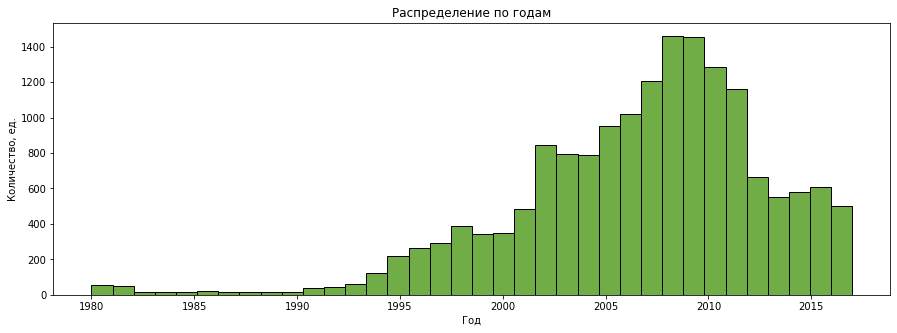

In [48]:
df['year_of_release'].plot(kind='hist', bins=36, range=(1980,2017), figsize=(15,5),  color="#70AD47", edgecolor="black")
plt.title("Распределение по годам")
plt.xlabel("Год")
plt.ylabel("Количество, ед.")
plt.show()

**По гистограмме видны определенные тренды по росту и снижению количества игр по годам. Как ранее было установлено данные тренды зачастую привязаны к выходу новых игровых платформ. Если принимать гипотезу, что сейчас конец 2016 года и необходимо опираться на данные для прогнозов на 2017 год - корректнее всего брать данные с 2012 года по 2016 год включительно. В данный период времени на рынок вышли консоли восьмого поколения, которые оставались наиболее актуальными до конца наблюдаемого периода. По данным на конец 2016 года - в 2017 году может состоятся релиз только 1 новой платформы (Xbox One X), в связи с чем можно предположить, что будет соблюдаться динамика последних лет.**

In [49]:
df_after_2012 = df.query('year_of_release >= 2012')

___

Далее необходимо проанализировать как менялись продажи по платформам с наибольшими суммарными продажами.

In [50]:
top_20_platforms = df.pivot_table(
    index = ['platform'], values = 'total_sales', aggfunc = 'sum').sort_values(
    "total_sales", ascending=False).reset_index().head(20)
top_20_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Получив список наиболее успешных платформ по количеству продаваемых игр можно построить их распределение по годам.

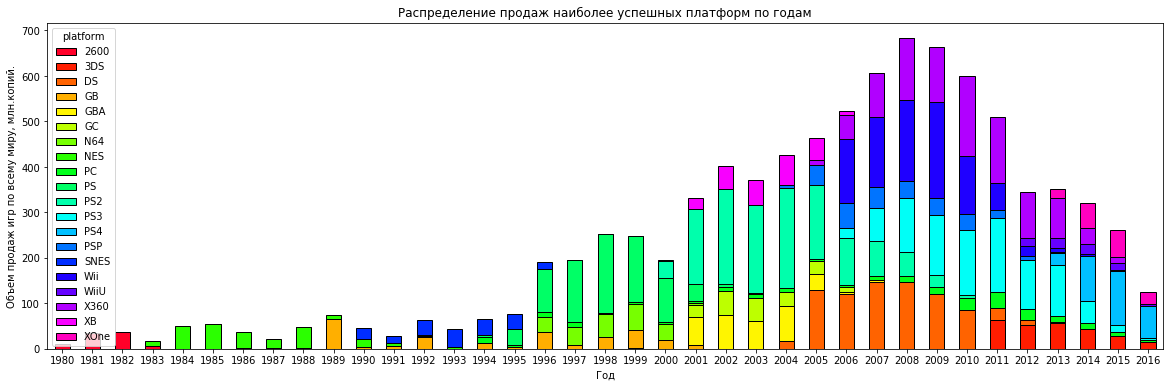

In [51]:
top_20_list = list(top_20_platforms['platform'])
top_20_query = df.query('platform in @top_20_list')
top_20_pivot = top_20_query.pivot_table(
    index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
ax = top_20_pivot.plot.bar(rot=0, stacked=True, figsize = (20,6), colormap="gist_rainbow", edgecolor = 'black')
plt.title("Распределение продаж наиболее успешных платформ по годам")
plt.xlabel("Год")
plt.ylabel("Объем продаж игр по всему миру, млн.копий.")
plt.show()

По данному графику можно увидеть, что в среднем игровые платформы сохраняют свою востребованность на протяжении 9-11 лет. Исключением является персональный компьютер из-за того что обновление компонентов в нем происходит постоянно, в отличии от игровых платформ, где обновления внедряются в рамках поколенческой смены моделей.

In [52]:
top_20_actual_period = df_after_2012.query('platform in @top_20_list').pivot_table(
    index='platform', values='total_sales', columns='year_of_release', aggfunc='sum')
top_20_actual_period

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.76,57.04,43.76,27.78,15.14
DS,11.67,1.54,NaN,NaN,NaN
PC,23.80,12.66,13.28,8.52,5.25
PS3,108.28,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.95,3.38,0.24,0.12,NaN
Wii,22.94,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60
X360,100.72,88.58,34.74,11.96,1.52


Тенденции по объему продаж за актуальный для прогноза период (**с 2012 года**)  можно выделить:
    
- объем продаж для консоли Game Boy Advance (GBA) снижается (8 лет на рынке);
- объем продаж Playstation 3(PS3) также снижается, хоть и менее резким темпом (7 лет на рынке);
- продажи недавно стартовавшей Nintendo 3DS (3DS) стабильны с момента начала продаж (2 года на рынке);
- лидер по темпам роста за период 2013 - 2016 - PS4, в 2014-2016 также лидер по объемам продаж видеоигр;
- начиная с 2014 года следующей консолью по объему продаж за PS4 идет XOne, выпущенная на рынок в 2013 году;
- объем продаж игр на ПК (PC) стабилен.

**По представленному графику и срезу к потенциально прибыльным платформам можно отнести:**
- **Playstation 4 (PS4)**;
- **X box One (XOne)**
- **Nintendo 3DS (3DS)**;
- **Персональный компьютер (PC)**;

На платформе Playstation 3 (PS3) по итогам 2016 года также были зафиксированы продажи игр, но фактически востребованность данной платформы прошла свой пик и снижалась с каждым годом после выхода нового поколения приставок от компании Sony (PS4). 

**Также в список потенциально прибыльных платформ можно было бы включить платформу Xbox One S выпущенную в конце 2016 года ( преемник X box One). Данная бюджетная версия (в сравнении с потенциально более дорогой Xbox One X) также имеет потенциал и не попала в выборку, вероятно, из-за позднего старта продаж в 2016 году.**

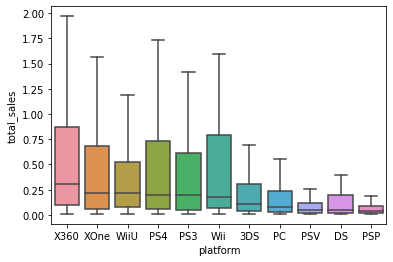

In [53]:
my_order = df_after_2012.groupby(by=["platform"])["total_sales"].median().sort_values(ascending=False).index
ax = sns.boxplot(x="platform", y="total_sales", 
                 data=df_after_2012, showfliers=False, order = my_order)

**Компания Xbox (Microsoft) занимает лидирующие позиции по объему продаж игровых тайтлов с платформами X360 и XOne, далее следует Nintendo и Sony.**

___
Далее можно изучить имеется ли зависимость между оценками критиков/пользователей и объемом продаж внутри одной из игровых платформ. 

Лучше выбирать из платформ по которым имеется существенный объем продаж - PS3 или PS4. В силу того, что PS4 вышла относительно недавно и еще только набирает объемы по продажам игр, было принято решение изучить зависимость по платформе PS3.

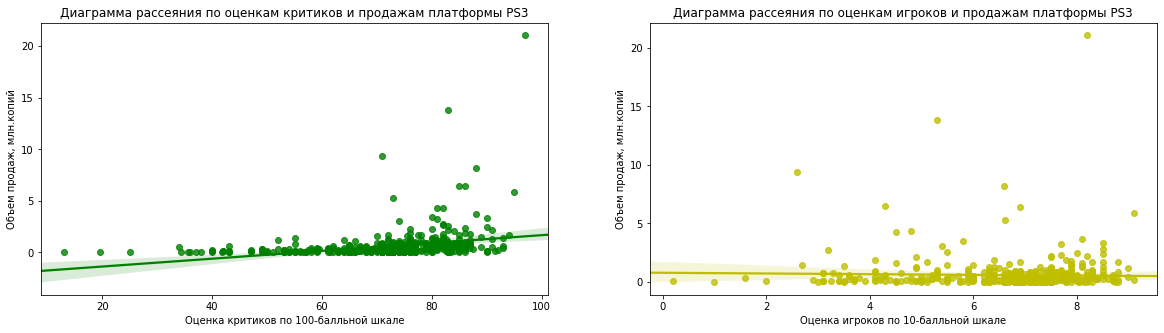

In [54]:
df_PS3 = df_after_2012.query('platform == "PS3"')

fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.regplot(data=df_PS3, x='critic_score', y = 'total_sales', ax=axs[0], color='g')
sns.regplot(data=df_PS3, x='user_score', y = 'total_sales', ax=axs[1], color='y')
axs[0].set_title('Диаграмма рассеяния по оценкам критиков и продажам платформы PS3')
axs[0].set_xlabel("Оценка критиков по 100-балльной шкале")
axs[0].set_ylabel("Объем продаж, млн.копий")
axs[1].set_title('Диаграмма рассеяния по оценкам игроков и продажам платформы PS3')
axs[1].set_xlabel("Оценка игроков по 10-балльной шкале")
axs[1].set_ylabel("Объем продаж, млн.копий")
plt.show()

In [55]:
display('Корреляция между оценками критиков и продажами: ', df_PS3['critic_score']. corr(df_PS3['total_sales']))
display('Корреляция между оценками игроков и продажами: ', df_PS3['user_score']. corr(df_PS3['total_sales']))

'Корреляция между оценками критиков и продажами: '

0.29575301239538504

'Корреляция между оценками игроков и продажами: '

-0.027577806185083112

**По графикам и значениям коэффициента корреляции видно, что оценки критиков слабо влияют на показатели продаж игр на платформе PS3, в то же время, оценки пользователей не влияют на продажи игр вовсе.**

Для всех остальных платформ установление ниличия зависимости между оценками и продажами выглядит следующим образом:

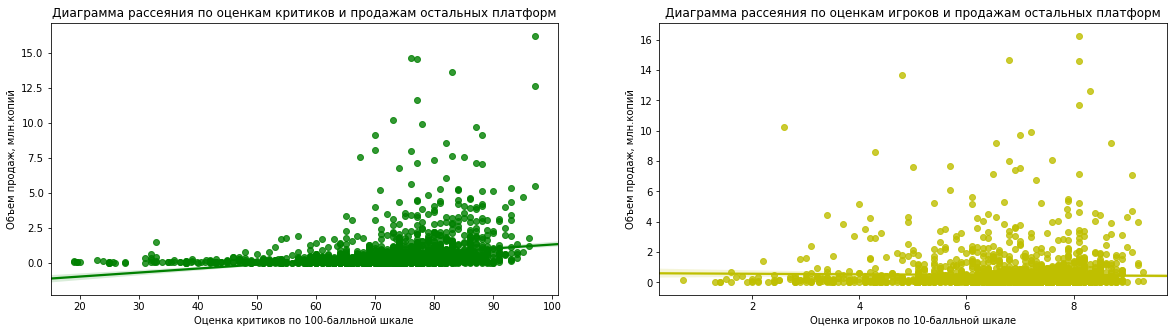

In [56]:
df_no_PS3 = df_after_2012.query('platform != "PS3"')

fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.regplot(data=df_no_PS3, x='critic_score', y = 'total_sales', ax=axs[0], color='g')
sns.regplot(data=df_no_PS3, x='user_score', y = 'total_sales', ax=axs[1], color='y')
axs[0].set_title('Диаграмма рассеяния по оценкам критиков и продажам остальных платформ')
axs[0].set_xlabel("Оценка критиков по 100-балльной шкале")
axs[0].set_ylabel("Объем продаж, млн.копий")
axs[1].set_title('Диаграмма рассеяния по оценкам игроков и продажам остальных платформ')
axs[1].set_xlabel("Оценка игроков по 10-балльной шкале")
axs[1].set_ylabel("Объем продаж, млн.копий")
plt.show()

In [57]:
display('Корреляция между оценками критиков и продажами: ', df_no_PS3['critic_score']. corr(df_no_PS3['total_sales']))
display('Корреляция между оценками игроков и продажами: ', df_no_PS3['user_score']. corr(df_no_PS3['total_sales']))

'Корреляция между оценками критиков и продажами: '

0.2624309936190389

'Корреляция между оценками игроков и продажами: '

-0.01924418353254232

**Таким образом, для всех остальных платформ зависимость продаж от пользовательских оценок также отсутствует, а зависимость от оценок критиков проявлена в меньшей степени, и ,фактически, практически не влияет на продажи.**

Далее необходимо изучить распределение игр по жанрам.

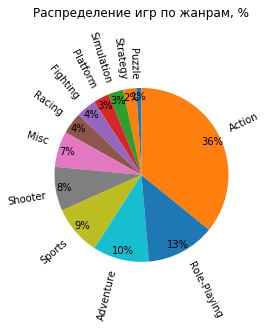

In [58]:
df_after_2012.groupby('genre')['genre'].count().sort_values(
    ascending=True).plot(kind='pie', autopct='%1.f%%', startangle=90, rotatelabels = True, pctdistance=0.9, label='')

plt.title('Распределение игр по жанрам, %', y=1.2)
plt.show()

**По графику видно, что более трети (36%) всех игр представленных в выборке выпущена в жанре *Action*, далее следуют игры жанра *Role-playing*. Разрыв между эти двумя позициями по количеству выпущенных игр почти трехкратный.**

Далее необходимо изучить какие из жанров являются наиболее востребованными у покупателей.

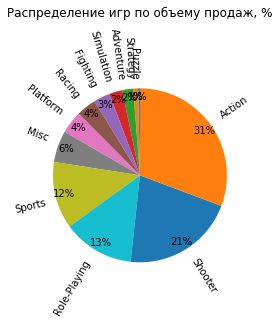

In [59]:
df_after_2012.groupby('genre')['total_sales'].sum().sort_values(
    ascending=True).plot(kind='pie', autopct='%1.f%%', startangle=90, rotatelabels = True, pctdistance=0.9, label='')

plt.title("Распределение игр по объему продаж, %", y=1.2)
plt.show()

**Как и в распределении по количеству игр, наиболее продаваемым жанром оказался *Action*.  Далее идут спортивные шутеры (Shooter), разница в объемах продаж между первыми двумя позициями гораздо менее существенная, чем в рейтинге по количеству выпускаемых игр. Игры в жанре *Role-playing* входят в тройку наиболее популярных у покупателей игр**

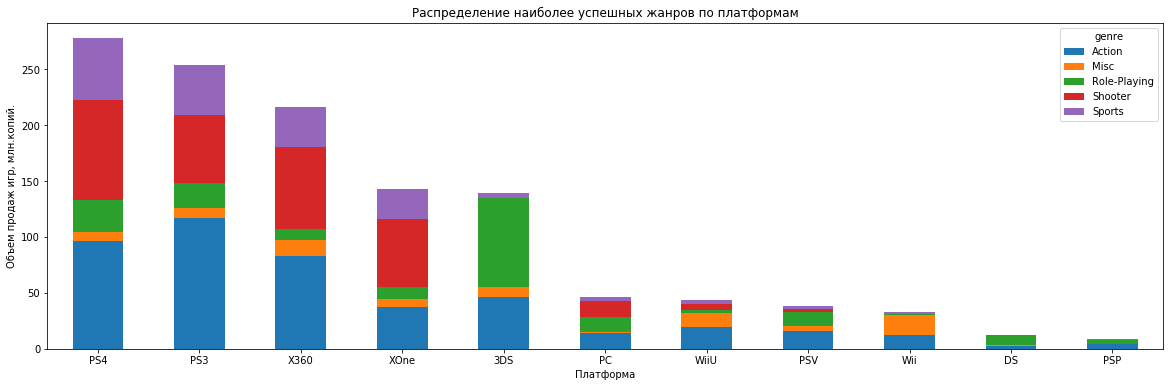

In [60]:
top_5_genres = df_after_2012.pivot_table(
    index = ['genre'], values = 'total_sales', aggfunc = 'sum').sort_values(
    "total_sales", ascending=False).reset_index().head(5)
top_5_genres = list(top_5_genres['genre'])
top_5_genres_query = df_after_2012.query('genre in @top_5_genres')
top_5_genres_pivot = top_5_genres_query.pivot_table(
    index='platform', columns = 'genre', values = 'total_sales', aggfunc = 'sum')
top_5_genres_pivot['total_sales'] = top_5_genres_pivot.sum(axis=1, numeric_only=None)
top_5_genres_pivot = top_5_genres_pivot.sort_values(by='total_sales', ascending=False)
top_5_genres_pivot.drop('total_sales', axis=1, inplace=True)
ax = top_5_genres_pivot.plot.bar(rot=0, stacked=True, figsize = (20,6))
plt.title("Распределение наиболее успешных жанров по платформам")
plt.xlabel("Платформа")
plt.ylabel("Объем продаж игр, млн.копий.")
plt.show()

**По построенному графику о самых прибыльных жанрах можно отметить:**
    
- жанр шутеров (Shooter) популярнее всего на PS4
- игры в жанре Role-playing были популярнее всего у обладателей 3DS
- на консолях PS2, PS3 и X360 игры жанра Action занимают более высокую долю, чем на других консолях.

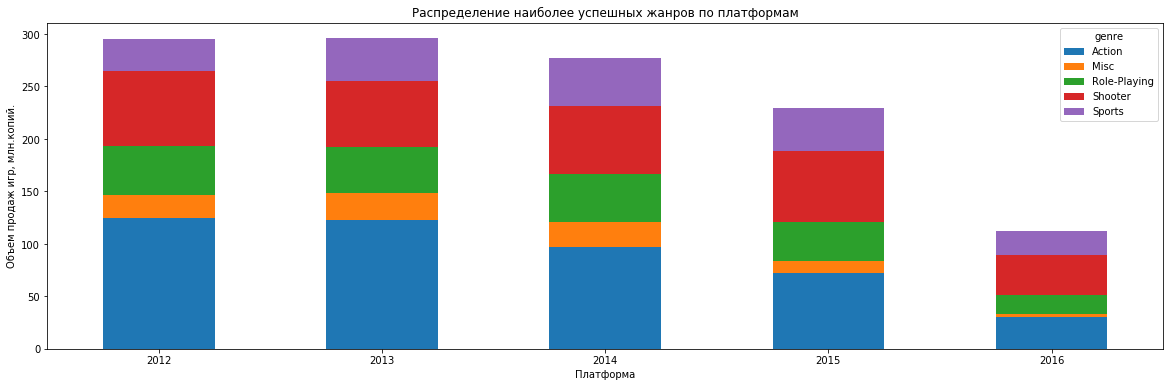

In [61]:
top_5_genres_pivot = top_5_genres_query.pivot_table(
    index='year_of_release', columns = 'genre', values = 'total_sales', aggfunc = 'sum')
ax = top_5_genres_pivot.plot.bar(rot=0, stacked=True, figsize = (20,6))
plt.title("Распределение наиболее успешных жанров по платформам")
plt.xlabel("Платформа")
plt.ylabel("Объем продаж игр, млн.копий.")
plt.show()

**По построенному графику о самых прибыльных жанрах можно отметить:**

- уровень продаж игр жанра Shooter за период 2012-2016 являлся наиболее стабильным в сравнении с другими жанрами;
- жанр *Misc* сократился по объему продаж в 2016 году сильнее игр других в других жанрах.

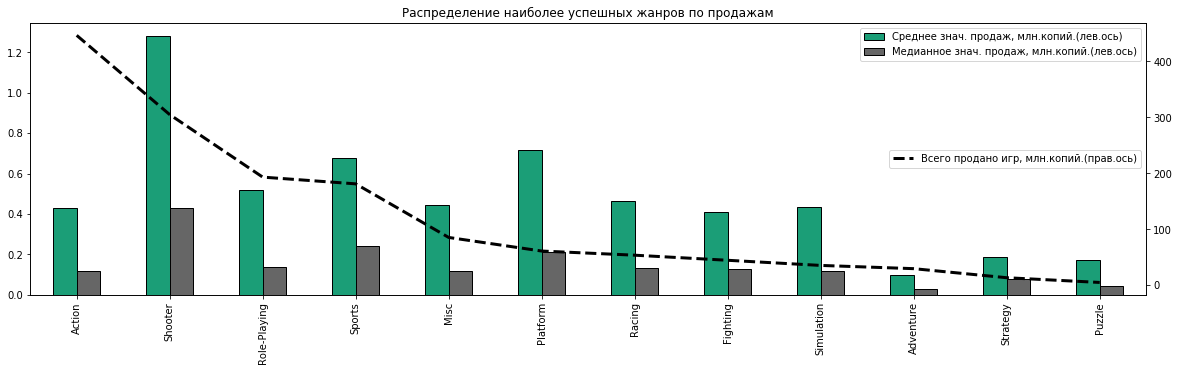

In [62]:
genre_metrics = df_after_2012.pivot_table(index='genre', values='total_sales', aggfunc=['mean','median','sum']).reset_index()
genre_metrics.columns=['genre','mean_sales', 'median_sales','total_sales']
genre_metrics = genre_metrics.sort_values(by='total_sales', ascending=False)

labels = list(genre_metrics['genre'])

ax = genre_metrics[['mean_sales','median_sales']].plot(kind='bar', use_index=True, figsize=(20,5), colormap="Dark2", edgecolor='black')
ax.set_xticklabels(labels)
ax2 = ax.twinx()
ax2.plot(genre_metrics['total_sales'].values,linestyle='--', linewidth=3.0, color = 'black')
ax.legend(('Среднее знач. продаж, млн.копий.(лев.ось)', 'Медианное знач. продаж, млн.копий.(лев.ось)'), loc='upper right')
ax2.legend(['Всего продано игр, млн.копий.(прав.ось)'], loc=5)
plt.title("Распределение наиболее успешных жанров по продажам")
plt.show()

In [63]:
genre_mean = df_after_2012.pivot_table(index='genre', values='total_sales', aggfunc=['mean','median','sum','count']).reset_index()
genre_mean.columns=['genre','mean_sales', 'median_sales','total_sales', 'total_games']
genre_mean = genre_mean.sort_values(by='median_sales', ascending=False)
genre_mean

,genre,mean_sales,median_sales,total_sales,total_games
8,Shooter,1.280756,0.430,304.82,238
10,Sports,0.675634,0.240,181.07,268
4,Platform,0.717647,0.210,61.00,85
7,Role-Playing,0.519059,0.140,193.09,372
6,Racing,0.461983,0.135,53.59,116
2,Fighting,0.408165,0.130,44.49,109
0,Action,0.428828,0.120,446.41,1041
3,Misc,0.441865,0.120,85.28,193
9,Simulation,0.435926,0.120,35.31,81
11,Strategy,0.187887,0.080,13.34,71


Без более мелкой детализации можно отметить, что **суммарно наиболее продаваемыми игровыми жанрами являются:**

- Action
- Shooter
- Role-playing
- Sports

Преимущество данных жанров в совокупной структуре продаж хорошо заметно.
Также можно отметить диспропорцию между показателями суммарных продаж и средними значениями. Так в жанре Action  втрое более низкие средние показатели продаж, чем в жанре Shooter, это значит, игр Action выпускается существенно больше, но Shooter коммерчески успешнее.

Игр в жанре РПГ (Role-Playing) в абсолютном выражении было выпущено больше, чем Shooter, а вот продавалось на 37% меньше. Это видно и по более чем двукратной разнице в среднего и медианного значений продаж.

Таким образом, при соотнесении медианных показателей продаж (во избежании перекоса из-за наличия AAA тайтлов), **коммерчески наиболее успешными жанрами являются**:

- Shooter
- Sports
- Platform
___

## Портрет пользователя каждого региона

В рамках составления портрета пользователя необходимо изучить наиболее востребованные платформы в Северной Америке, Европе и Японии.

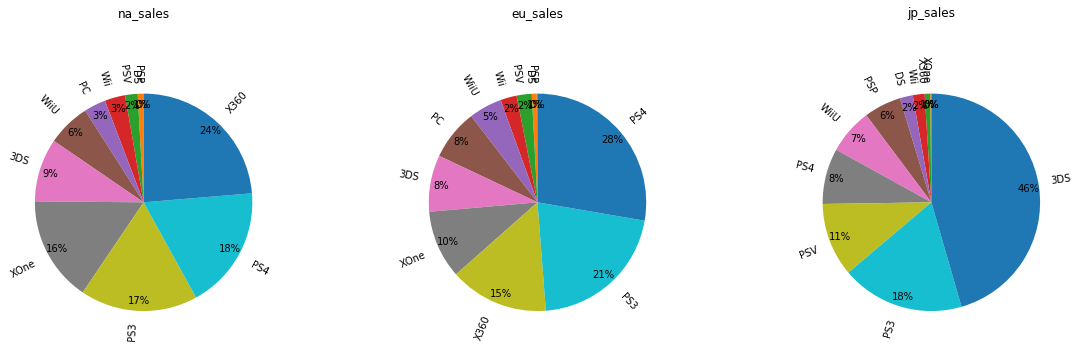

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
counter = 0

for region in ('na_sales', 'eu_sales', 'jp_sales'):
    fd = df_after_2012.groupby('platform')[region].sum().sort_values(ascending=True)    
    fd.plot(kind='pie', ax = axs[counter], autopct='%1.f%%', startangle=90, rotatelabels = True, pctdistance=0.9, label='')
    axs[counter].set_title(region, pad=50)
    counter +=1

**На представленных графиках можно отметить:**
- В Северной Америке и Европе в топ-5 платформ первые 4 строки занимают продажи игр для консолей от Sony и Microsoft(PS4, PS3, X360 и XOne), а консоль 3DS едва попадает в топ-5 платформ по объему продажи игр. В Японии же, объем проданных игр для 3DS занимает первую строчку по объему проданных игр.
- В Северной Америке и Европе разрыв между соседними строчками в топ-5 платформ по продажам относительно небольшой (1-7%), в то же время в Японии 3DS по объему продаж почти втрое превышает PS3.
- В Японии в топ-5 рейтинге платформ по объему проданных игр вошли только консоли производимые в Японии.
___

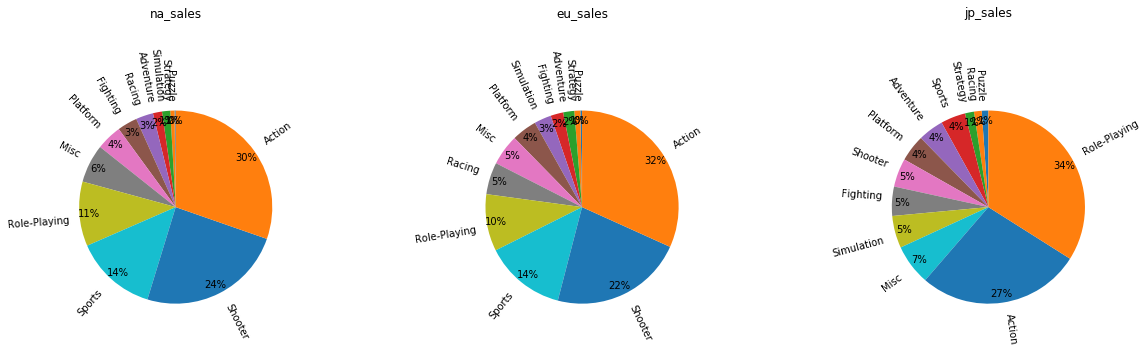

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
counter = 0

for region in ('na_sales', 'eu_sales', 'jp_sales'):
    fd = df_after_2012.groupby('genre')[region].sum().sort_values(ascending=True)    
    fd.plot.pie(ax = axs[counter], autopct='%1.f%%', startangle=90, rotatelabels = True, pctdistance=0.9, label='')
    plt.tight_layout()
    axs[counter].set_title(region, pad=70)
    counter +=1  


**На представленных графиках можно отметить:**
- В Северной Америке и Европе в топ-5 жанров первые 4 строки занимают: *Action, Shooter, Sports, Role-playing*. При этом, помимо совпадения самих жанров, практически идентичных и их доли в совокупной структуре продаж игр.
- В Северной Америке и Европе явно наблюдается разрыв в доле между 4-мя наиболее популярными жанрами и всеми остальными (доля которых не превышает 5-6%).
- В Японии наиболее популярным жарном игры у покупателей является *Role-playing*, а лидер стран Северной Америки и Европы (*Action*) лишь второй. Суммарно на 2 этих жанра приходится почти 2/3 (61%) от всех купленных игр, доля остальных жанров по отдельности не превышает 7%.

___

Далее необходимо изучить влияние рейтинга ESRB на продажи.

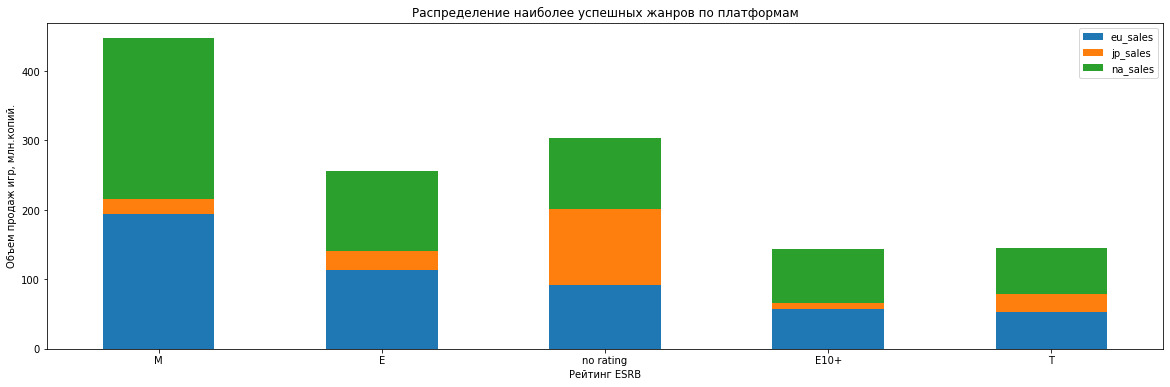

In [66]:
groupby_rating = df_after_2012.pivot_table(index=['rating'],
                                      values =['na_sales', 'eu_sales', 'jp_sales'],
                                      aggfunc=sum).sort_values(by='na_sales', ascending=False)


ax = groupby_rating.plot.bar(rot=0, stacked=True, figsize = (20,6))
plt.title("Распределение наиболее успешных жанров по платформам")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Объем продаж игр, млн.копий.")
plt.show()

In [76]:
df_after_2012.pivot_table(index='platform', columns='rating', values='total_sales', aggfunc='count')

rating,E,E10+,M,T,no rating
platform,,,,,
3DS,56.0,55.0,9.0,27.0,255.0
DS,10.0,6.0,NaN,NaN,16.0
PC,36.0,18.0,95.0,41.0,65.0
PS3,64.0,40.0,106.0,91.0,193.0
PS4,54.0,40.0,76.0,85.0,137.0
PSP,5.0,1.0,NaN,2.0,167.0
PSV,20.0,23.0,32.0,64.0,273.0
Wii,17.0,16.0,NaN,2.0,20.0
WiiU,35.0,42.0,15.0,13.0,42.0


**На представленном графике можно отметить:**
    
- Наиболее популярными у покупателей из Северной Америки и Европы были игры с рейтингом M;
- Следующими по популярности у покупателей из Северной Америки и Европы были игры с рейтингом E;
- Существенная игр в выборке была без указания рейтинга;
- Столь существенная доля игр продяющихся в Японии без рейтинга объясняется тем, что ESRB не давала оце  

Ввиду отсутствия существенной части данных по рейтингу игр от ESRB, нельзя достоверно сказать, влияет ли рейтинг на продажи игр. По имеющимся данным явного влияния на объем продаж не выявлено.
___

## Проверка гипотез

**Нулевая гипотеза** - средние пользовательские рейтинги платформ Xbox One и PC равны

**Альтернативная гипотеза** - средние пользовательские рейтинги платформ Xbox One и PC не равны

alpha = 5%

Перед проведением статитистического теста проведем тест Барлетта, чтобы определить равны ли дисперсии выборок.

In [68]:
XOne = df_after_2012.query('platform == "XOne"')['user_score']
PC = df_after_2012.query('platform == "PC"')['user_score']
stat, p = bartlett(XOne, PC)
p

0.0007278452277413781

Поскольку p-value менее 5%, при расчете статистического теста можно указать, что дисперсии выборок не равны.

In [69]:
alpha = .05

results = st.ttest_ind(
    XOne, 
    PC, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6555050065020716
Не получилось отвергнуть нулевую гипотезу


In [70]:
display(XOne.median())
display(PC.median())

6.9

7.1

По итогам данного статистического теста не удалось опровергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны. Медианные значения по выборке также очень близки. 
Если бы гипотеза была отвергнута с вероятностью 66% данное решение могло бы быть ошибочным.
___

**Нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports равны

**Альтернативная гипотеза** - средние пользовательские рейтинги жанров Action и Sports не равны

alpha = 5%

Перед проведением статитистического теста проведем тест Барлетта, чтобы определить равны ли дисперсии выборок.

In [71]:
Action = df_after_2012.query('genre == "Action"')['user_score']
Sports = df_after_2012.query('genre == "Sports"')['user_score']
stat, p = bartlett(Action, Sports)
p

2.207011700339308e-18

Поскольку p-value менее 5%, при расчете статистического теста можно указать, что дисперсии выборок не равны.

In [72]:
alpha = .05

results = st.ttest_ind(
    Action, 
    Sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.321966496060266e-30
Отвергаем нулевую гипотезу


In [73]:
display(Action.median())
display(Sports.median())

7.2

5.95

C уверенностью 99% можно утверждать, что средние пользовательские рейтинги жанров Action и Sports отличаются.
Чаще пользователи оценивали игры жанра Action выше, чем игры жанра Sport.
___

## Вывод

По результатам статистических тестов не удалось опровергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны. Также по результатам статистических тестов c уверенностью 99% можно утверждать, что средние пользовательские рейтинги жанров Action и Sports отличаются.

Дополнительно в рамках исследования установлено:
- По состоянию на конец 2016 года наиболее актуальными на рынке остаются консоли восьмого поколения (PS4, Xbox One S). В 2017 году запланирован релиз только 1 новой платформы, в связи с чем можно предположить, что будет соблюдаться динамика последних лет с выхода вышеупомянутых консолей (2012-2016 годы). Этот период и следует брать для прогноза на 2017 год;

- среднем игровые платформы сохраняют свою востребованность на протяжении 9-11 лет;

- По состоянию на конец 2016 года к потенциально прибыльным платформам можно отнести: Playstation 4 (PS4),Nintendo 3DS (3DS), Персональный компьютер (PC). Также в список потенциально прибыльных платформ можно было бы включить платформу Xbox One S выпущенную в конце 2016 года (вероятно, не попала в выборку из-за позднего старта продаж);

- Зависимость продаж от пользовательских оценок отсутствует, а зависимость от оценок критиков также практически не влияет на продажи;

- Глобально наиболее продаваемым жанром оказались игры жанра Action.